# Clustering Techniques -- Beyond K-Means

Understanding the similarities and differences in data is a foundational challenge to any business's data strategy. Whether it's identifying customers with shared nuances and idiosyncrasies or determining homogeneous gene sequences for cancer research, several techniques exist for grouping data -- otherwise known as clustering to the data science world or segmentation to the business world.

One of the most commonly used methods by analytics practitioners is K-Means Clustering. Its easy-to-understand process and variety of applications make it a popular technique and probably the first (if not only) clustering method taught to statistics students. Yet for all that K-Means is good for, it isn't a panacea. Like all statistical modeling methods it has its pros, cons, and of course, underlying assumptions. Today we're going to explore alternative clustering techniques to K-Means for situations were its performance can be suboptimal.

## Assumptions of K-Means

For the sake of brevity, I'll assume the reader has an understanding of how K-Means works (for a refresher, go [here](https://en.wikipedia.org/wiki/K-means_clustering)). Some of the underlying assumptions that make K-Means an efficient clustering technique (especially on the very large data sets you'd expect to find in a productionized big data solution) also can be its greatest weaknesses. While there's no doubt that K-Means will cluster any data you feed into it, the resulting clusters may not realistically capture the underlying relationships an analyst seeks to find.

Let's explore three assumptions of K-Means that, if violated, can result in poor or downright inaccurate clusters:

* The number of clusters is known beforehand.
* Data is roughly spherical and easily separable.
* Clusters are approximately the same size.

It should be noted that even when these assumptions *are* met, the iterative nature and randomized placement of centroids at algorithm initialization can lead K-Means to cluster data differently with each run if not reach convergence at local optima rather than global. As with any statistical technique, never blindly apply and accept the results!

## The number of clusters is known beforehand

K-Means requires the number of clusters to be determined before the algorithm is run. This requires some level of understanding about the data structure that an analyst may not have knowledge of. For example, a hospital interested in readmissions of diabetes patients given a specific treatment might already *know* that there are two potential clusters for the population to fall in: readmitted or not. How well these groups are distinguished by the features that describe them in a given data set is another story, but needless to say an analyst given this previous knowledge of the number of clusters would satisfy this criterion.

Yet real life isn't so easily partitioned. Clustering is more widely used in unsupervised learning applications where we *do not* have this prior knowledge and instead seek to determine clusters by the natural structure of the data only then to determine the meaning of the clusters we've arrived at.

Let's visualize two toy data sets to illustrate how simply guessing the number of clusters a priori can lead to poor outcomes:

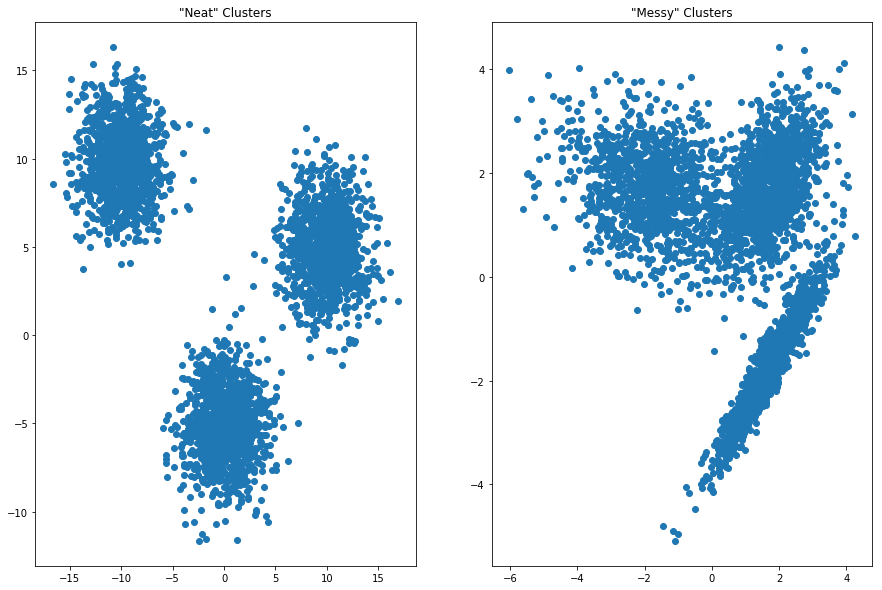

In [129]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, y_neat = datasets.make_blobs(n_samples=3500, 
                                     centers=centers_neat,
                                     cluster_std=2,
                                     random_state=2)

centers_messy = [(-10, 10),(-10,0),(5,5)]
x_messy, y_messy = datasets.make_classification(n_samples=3500,
                                                n_informative=2,
                                                n_classes=3,
                                                n_clusters_per_class=1,
                                                class_sep=1.7,
                                                shuffle=False,
                                                random_state=2)
plt.figure(figsize=(15,10))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])

Our data set on the left seems to clearly exhibit having 3 well-defined clusters while the set on the right is a little more nebulous. Is it 2 clusters? Maybe 3? While there is a subjective aspect to determining the number of clusters, there is also a necessary relevancy in order to achieve the optimal outcome. In a business environment, choosing to cluster your customers into 3 rather than 2 clusters can mean the difference in creating 3 marketing campaigns as opposed to 2. What could the monetary loss be trying to serve what are perceived to be 3 distinct groups of customers when in reality the difference between 2 of the three clusters is negligible?

K-Means isn't at a total loss in these respects. Any analyst with appropriate experience will know that K-Means should always be cross-validated with different values for K. Furthermore, the randomization of cluster centroids at algorithm initialization can elicit different results with each iteration. Therefore finding the optimal number of clusters comes down to algorithm iteration and performance metrics like those described [here](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).

n